<a href="https://colab.research.google.com/github/Madou10-lab/image-classification-using-deep-learning/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import flask
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.utils import np_utils

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [ ]:
x_test2 = (x_test/255) - 0.5
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_test2 = np_utils.to_categorical(y_test, NUM_CLASSES)

now let's load the model that we developed

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
# make test predictions
preds = loaded_model.predict(x_test2)
y_preds = np.argmax(preds, axis=1)
y_pred_max_probas = np.max(preds, axis=1)

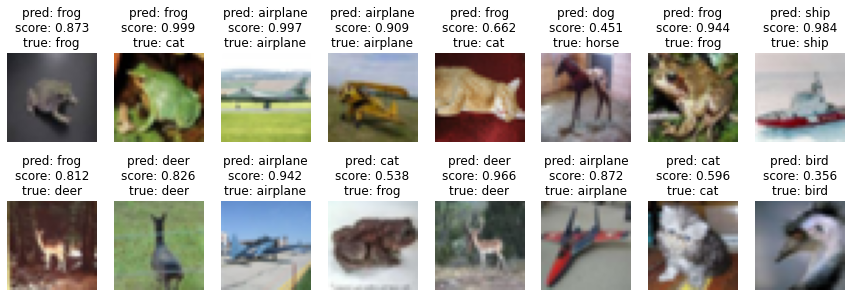

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_preds[random_index]]
        pred_proba = y_pred_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()